In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from dask.distributed import Client

%matplotlib inline

In [2]:
locpath='/data0/project/drakkar/CONFIGS/CREG025.L75/GRID/'
locfile='CREG025.L75-BCTGE28_mesh_zgr.nc'
fieldzgr=xr.open_dataset(locpath+locfile)
fieldzgr

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float32 ...
    gdepu         (t, z, y, x) float32 ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  04/04/2019 08:49:23 -0000

In [3]:
fieldzgrtime=fieldzgr.rename_vars({'time_counter':'time'})


In [4]:
fieldzgrtime

<xarray.Dataset>
Dimensions:   (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon   (y, x) float32 ...
    nav_lat   (y, x) float32 ...
    nav_lev   (z) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
    time      (t) float64 0.0
    mbathy    (t, y, x) int16 ...
    misf      (t, y, x) int16 ...
    isfdraft  (t, y, x) float32 ...
    e3t_0     (t, z, y, x) float64 ...
    e3u_0     (t, z, y, x) float64 ...
    e3v_0     (t, z, y, x) float64 ...
    e3w_0     (t, z, y, x) float64 ...
    gdept_0   (t, z, y, x) float32 ...
    gdepu     (t, z, y, x) float32 ...
    gdepv     (t, z, y, x) float32 ...
    gdepw_0   (t, z, y, x) float32 ...
    gdept_1d  (t, z) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    gdepw_1d  (t, z) float64 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
    e3t_1d    (t, z) float64 1.023 1.079 1.147 1.233 ... 202.6 203.2 203.8 204.2
    e3w_1d    (t, z) float64 1.0 1.05 1.111 1.188 ... 202.2 202.9 203.5 204.0
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  04/04/2019 08:49:23 -0000

In [5]:
fieldzgrnew=fieldzgrtime.rename_dims({'t':'time_counter','z':'deptht'})

In [6]:
fieldzgrnew

<xarray.Dataset>
Dimensions:   (deptht: 75, time_counter: 1, x: 528, y: 603)
Dimensions without coordinates: deptht, time_counter, x, y
Data variables:
    nav_lon   (y, x) float32 ...
    nav_lat   (y, x) float32 ...
    nav_lev   (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time      (time_counter) float64 0.0
    mbathy    (time_counter, y, x) int16 ...
    misf      (time_counter, y, x) int16 ...
    isfdraft  (time_counter, y, x) float32 ...
    e3t_0     (time_counter, deptht, y, x) float64 ...
    e3u_0     (time_counter, deptht, y, x) float64 ...
    e3v_0     (time_counter, deptht, y, x) float64 ...
    e3w_0     (time_counter, deptht, y, x) float64 ...
    gdept_0   (time_counter, deptht, y, x) float32 ...
    gdepu     (time_counter, deptht, y, x) float32 ...
    gdepv     (time_counter, deptht, y, x) float32 ...
    gdepw_0   (time_counter, deptht, y, x) float32 ...
    gdept_1d  (time_counter, deptht) float64 0.5058 1.556 ... 5.902e+03
    gdepw_1d  (time_counter, deptht) float64 0.0 1.024 ... 5.596e+03 5.8e+03
    e3t_1d    (time_counter, deptht) float64 1.023 1.079 1.147 ... 203.8 204.2
    e3w_1d    (time_counter, deptht) float64 1.0 1.05 1.111 ... 203.5 204.0
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  04/04/2019 08:49:23 -0000

In [7]:
main_dir='/data0/project/drakkar/CONFIGS/CREG025.L75/TMPDIR/'
#tsfld=xr.open_dataset(main_dir+'CREG025.L75-ERA01NEM405LAS_y2000.5d_gridT.nc')
#tsfld=xr.open_dataset(main_dir+'CREG025.L75-ERA01NEM405LAS_y2000m08.5d_gridT.nc')
tsfld=xr.open_dataset(main_dir+'CREG025.L75-ERA01NEM405LAS_y2000m03.5d_gridT.nc')

In [8]:
tsfld

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 1, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) object 2000-03-14 12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    vosaline      (time_counter, deptht, y, x) float32 ...
    ssh           (time_counter, y, x) float32 ...
    mldkz5        (time_counter, y, x) float32 ...
    mldr10_1      (time_counter, y, x) float32 ...
    rhop_sig0     (time_counter, deptht, y, x) float32 ...
    botpres       (time_counter, y, x) float32 ...
Attributes:
    start_date:        19790102
    output_frequency:  5d
    CONFIG:            CREG025.L75
    CASE:              ERA01NEM405LAS

In [9]:
# Compute de ML T/S budget annual mean to start
ds_out=xr.Dataset()
ds_out['e3t_0msk ']= (('deptht','y','x'), xr.where(fieldzgrnew['gdept_0'][0,:,:,:] < tsfld['mldr10_1'][0,:,:], fieldzgrnew['e3t_0'][0,:,:,:], 0.) )
ds_out['e3t_0sum ']= (('y','x'),ds_out['e3t_0msk '].sum(dim=('deptht')))
ds_out['T_mldM ']= (('y','x'), (ds_out['e3t_0msk ']*tsfld['votemper'][0,:,:,:]).sum(dim=('deptht'))/ds_out['e3t_0sum '])
ds_out['S_mldM ']= (('y','x'), (ds_out['e3t_0msk ']*tsfld['vosaline'][0,:,:,:]).sum(dim=('deptht'))/ds_out['e3t_0sum '])

In [10]:
vmin=-2. ; vmax=6. ; vint=0.2
contoursT=np.arange(vmin,vmax+vint,vint)

vmin=25. ; vmax=36. ; vint=0.5
contoursS=np.arange(vmin,vmax+vint,vint)

Text(0.5, 1.0, ' Mean temperature in the ML \n 2000')

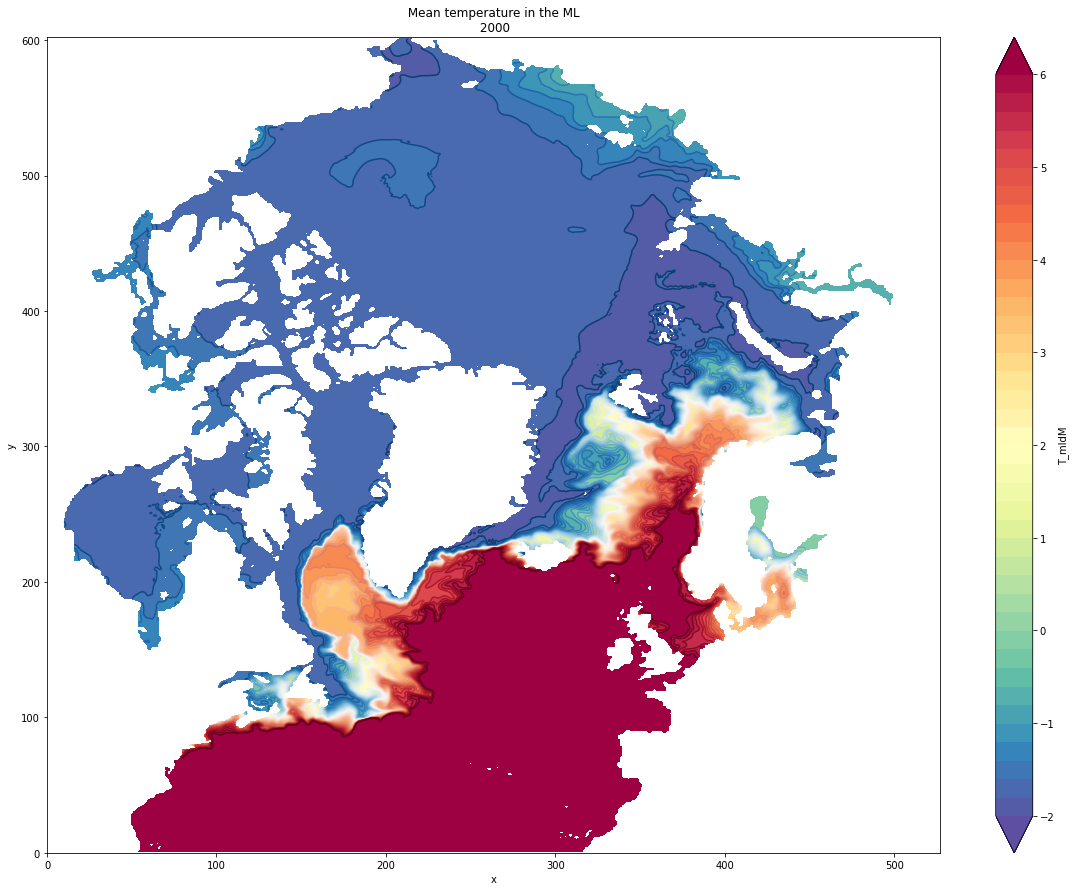

In [11]:
zclimyear='2000'
# Plots figures
plt.figure(figsize=(20,15))

#plt.subplot(211)
ds_out['T_mldM '].plot.contourf(levels=contoursT,cmap=plt.cm.get_cmap('Spectral_r'),extend='both')
ds_out['T_mldM '].plot.contour(levels=contoursT)
plt.title(' Mean temperature in the ML \n '+ str(zclimyear))

Text(0.5, 1.0, ' Mean salinity in the ML \n 2000')

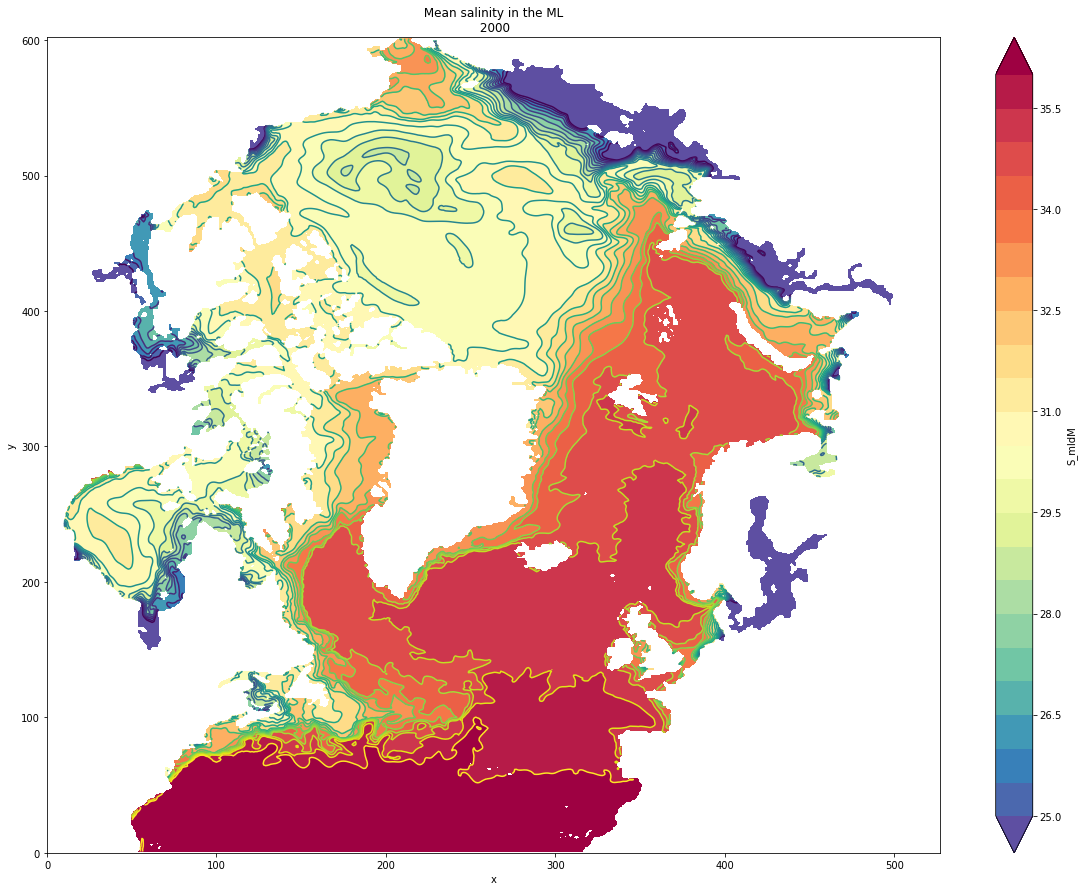

In [12]:
plt.figure(figsize=(20,15))

#plt.subplot(212)
ds_out['S_mldM '].plot.contourf(levels=contoursS,cmap=plt.cm.get_cmap('Spectral_r'),extend='both')
ds_out['S_mldM '].plot.contour(levels=contoursS)
plt.title(' Mean salinity in the ML \n '+ str(zclimyear))

#zfile_ext='_MLDTS_'
#plt.savefig(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.png',dpi=300)

#ds_out.to_netcdf(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.nc')

Text(0.5, 1.0, ' Mean salinity in the ML \n 2000')

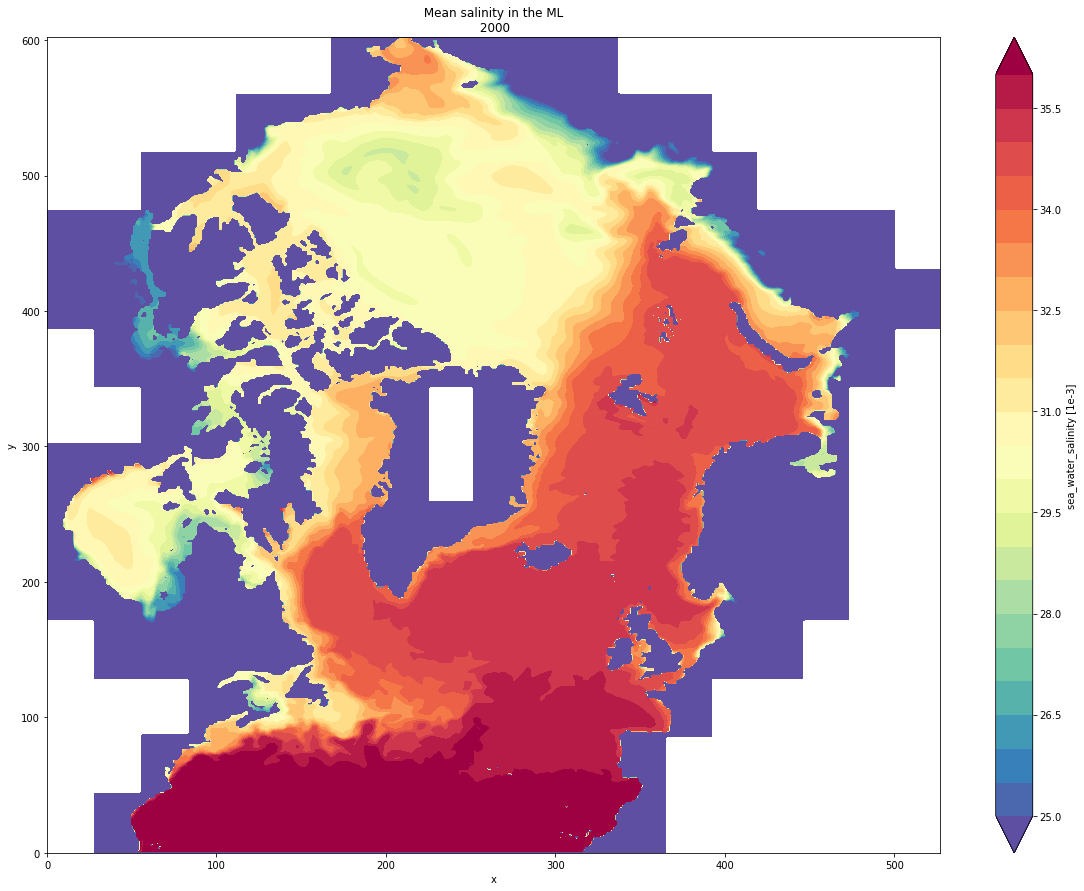

In [13]:
plt.figure(figsize=(20,15))

#plt.subplot(212)
tsfld['vosaline'][0,0,:,:].plot.contourf(levels=contoursS,cmap=plt.cm.get_cmap('Spectral_r'),extend='both')
#tsfld['vosaline'][0,0,:,:].plot.contour(levels=contoursS)
plt.title(' Mean salinity in the ML \n '+ str(zclimyear))

#zfile_ext='_MLDTS_'
#plt.savefig(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.png',dpi=300)

#ds_out.to_netcdf(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.nc')

Text(0.5, 1.0, ' MLD \n 2000')

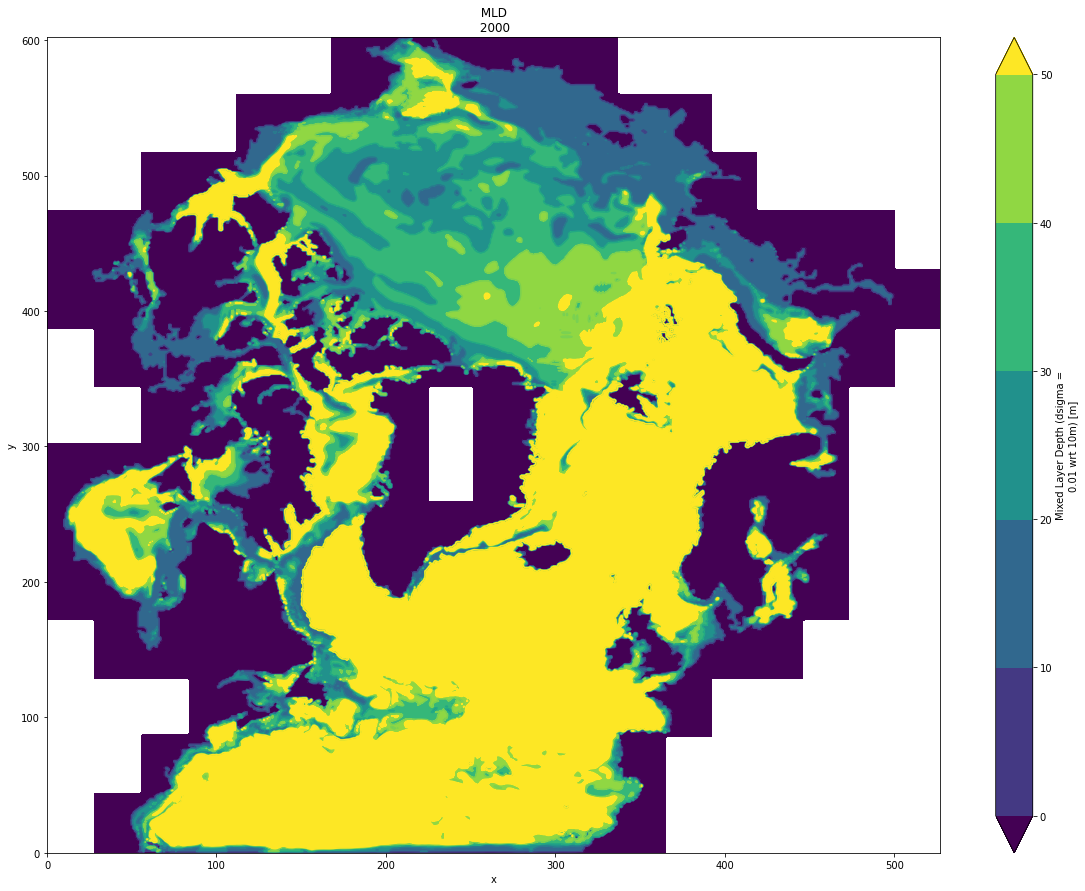

In [14]:
plt.figure(figsize=(20,15))

vmin=0. ; vmax=50. ; vint=10
contoursM=np.arange(vmin,vmax+vint,vint)

#plt.subplot(212)
tsfld['mldr10_1'][0,:,:].plot.contourf(levels=contoursM,cmap=plt.cm.get_cmap('viridis'),extend='both')
tsfld['mldr10_1'][0,:,:].plot.contour(levels=contoursM)
plt.title(' MLD \n '+ str(zclimyear))

#zfile_ext='_MLDTS_'
#plt.savefig(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.png',dpi=300)

#ds_out.to_netcdf(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.nc')

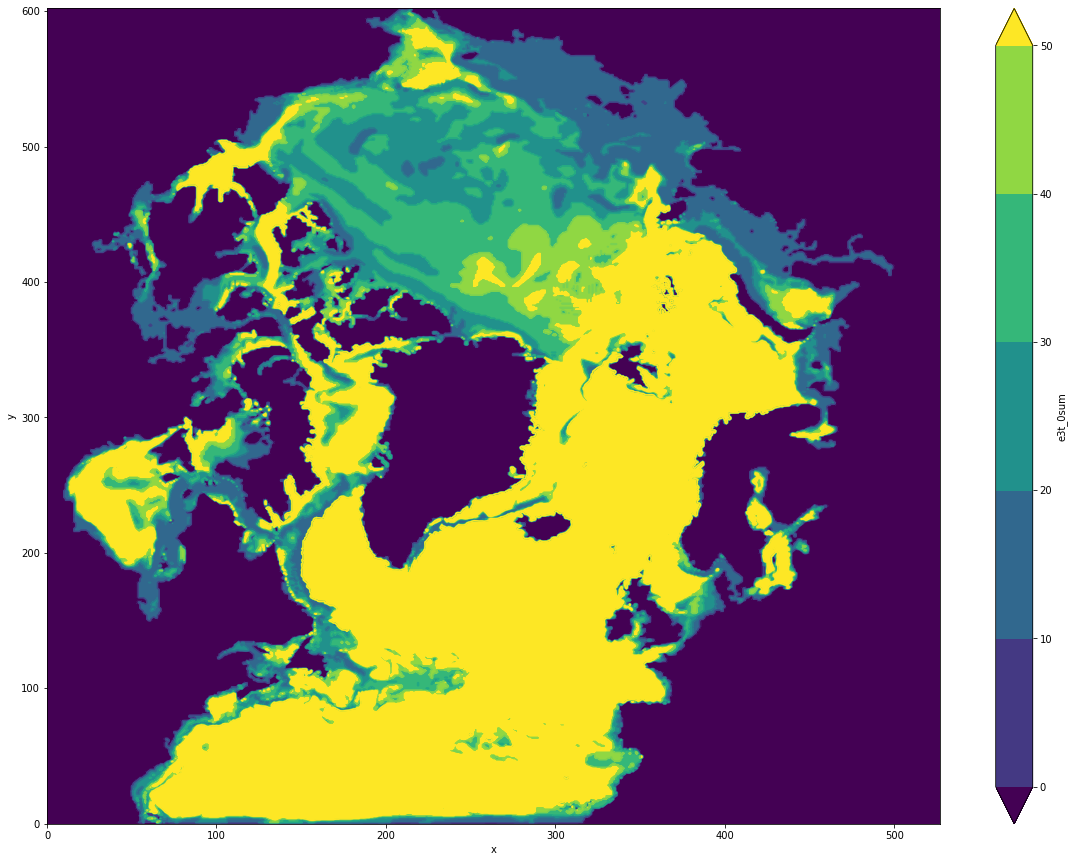

In [15]:
vmin=0. ; vmax=50. ; vint=10.
contoursL=np.arange(vmin,vmax+vint,vint)

plt.figure(figsize=(20,15))

#plt.subplot(212)
ds_out['e3t_0sum '].plot.contourf(levels=contoursL,cmap=plt.cm.get_cmap('viridis'),extend='both')
ds_out['e3t_0sum '].plot.contour(levels=contoursL)
#plt.title(' Mean salinity in the ML \n '+ str(zclimyear))

#zfile_ext='_MLDTS_'
#plt.savefig(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.png',dpi=300)

#ds_out.to_netcdf(zCONF+'-'+zCASE++zfile_ext+'y'+str(zclimyear)+'.nc')

>> # 1D control 

In [20]:
#ii=250; jj=500 ; jk= 12  #jk=12

ii=300; jj=550 ; jk= 8  #jk=12

print('e3t_0sum:',ds_out['e3t_0sum '][jj,ii].values)
print('MLD     :',tsfld['mldr10_1'][0,jj,ii].values)
print('e3t_0   :',np.cumsum(fieldzgrnew['e3t_0'][0,0:jk,jj,ii].values))
print('T       :',tsfld['votemper'][0,0:jk,jj,ii].values)
print('S       :',tsfld['vosaline'][0,0:jk,jj,ii].values)
print()
print('Szmld   :',ds_out['S_mldM '][jj,ii].values)
print('Tzmld   :',ds_out['T_mldM '][jj,ii].values)

print()
print()

print('My S mean   :',(np.sum(fieldzgrnew['e3t_0'][0,0:jk,jj,ii]*tsfld['vosaline'][0,0:jk,jj,ii])/ds_out['e3t_0sum '][jj,ii]).values)
print('My T mean   :',(np.sum(fieldzgrnew['e3t_0'][0,0:jk,jj,ii]*tsfld['votemper'][0,0:jk,jj,ii])/ds_out['e3t_0sum '][jj,ii]).values)



e3t_0sum: 10.759652512917114
MLD     : 10.767898
e3t_0   : [ 1.02346105  2.10218656  3.24960953  4.48248899  5.82161153  7.29252691
  8.92623128 10.75965251]
T       : [-1.3428937 -1.3428937 -1.3428937 -1.3417922 -1.329917  -1.315821
 -1.3028218 -1.2914876]
S       : [24.73028  24.73028  24.73028  24.730604 24.772017 24.85497  24.9554
 25.062223]

Szmld   : 24.843301491599682
Tzmld   : -1.3226075670160227


My S mean   : 24.84330149159969
My T mean   : -1.3226075670160227


In [17]:
aze=np.arange(10)
aze

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.cumsum(aze)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])